# Project: Identify Customer Segments

In this project, you will apply unsupervised learning techniques to identify segments of the population that form the core customer base for a mail-order sales company in Germany. These segments can then be used to direct marketing campaigns towards audiences that will have the highest expected rate of returns. The data that you will use has been provided by our partners at Bertelsmann Arvato Analytics, and represents a real-life data science task.

This notebook will help you complete this task by providing a framework within which you will perform your analysis steps. In each step of the project, you will see some text describing the subtask that you will perform, followed by one or more code cells for you to complete your work. **Feel free to add additional code and markdown cells as you go along so that you can explore everything in precise chunks.** The code cells provided in the base template will outline only the major tasks, and will usually not be enough to cover all of the minor tasks that comprise it.

It should be noted that while there will be precise guidelines on how you should handle certain tasks in the project, there will also be places where an exact specification is not provided. **There will be times in the project where you will need to make and justify your own decisions on how to treat the data.** These are places where there may not be only one way to handle the data. In real-life tasks, there may be many valid ways to approach an analysis task. One of the most important things you can do is clearly document your approach so that other scientists can understand the decisions you've made.

At the end of most sections, there will be a Markdown cell labeled **Discussion**. In these cells, you will report your findings for the completed section, as well as document the decisions that you made in your approach to each subtask. **Your project will be evaluated not just on the code used to complete the tasks outlined, but also your communication about your observations and conclusions at each stage.**

In [1]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# magic word for producing visualizations in notebook
%matplotlib inline

'''
Import note: The classroom currently uses sklearn version 0.19.
If you need to use an imputer, it is available in sklearn.preprocessing.Imputer,
instead of sklearn.impute as in newer versions of sklearn.
'''

'\nImport note: The classroom currently uses sklearn version 0.19.\nIf you need to use an imputer, it is available in sklearn.preprocessing.Imputer,\ninstead of sklearn.impute as in newer versions of sklearn.\n'

### Step 0: Load the Data

There are four files associated with this project (not including this one):

- `Udacity_AZDIAS_Subset.csv`: Demographics data for the general population of Germany; 891211 persons (rows) x 85 features (columns).
- `Udacity_CUSTOMERS_Subset.csv`: Demographics data for customers of a mail-order company; 191652 persons (rows) x 85 features (columns).
- `Data_Dictionary.md`: Detailed information file about the features in the provided datasets.
- `AZDIAS_Feature_Summary.csv`: Summary of feature attributes for demographics data; 85 features (rows) x 4 columns

Each row of the demographics files represents a single person, but also includes information outside of individuals, including information about their household, building, and neighborhood. You will use this information to cluster the general population into groups with similar demographic properties. Then, you will see how the people in the customers dataset fit into those created clusters. The hope here is that certain clusters are over-represented in the customers data, as compared to the general population; those over-represented clusters will be assumed to be part of the core userbase. This information can then be used for further applications, such as targeting for a marketing campaign.

To start off with, load in the demographics data for the general population into a pandas DataFrame, and do the same for the feature attributes summary. Note for all of the `.csv` data files in this project: they're semicolon (`;`) delimited, so you'll need an additional argument in your [`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) call to read in the data properly. Also, considering the size of the main dataset, it may take some time for it to load completely.

Once the dataset is loaded, it's recommended that you take a little bit of time just browsing the general structure of the dataset and feature summary file. You'll be getting deep into the innards of the cleaning in the first major step of the project, so gaining some general familiarity can help you get your bearings.

In [2]:
# Load in the general demographics data.
azdias = pd.read_csv('Udacity_AZDIAS_Subset.csv', delimiter=';')

# Load in the feature summary file.
feat_info = pd.read_csv('AZDIAS_Feature_Summary.csv', delimiter=';')

In [3]:
# Check the structure of the data after it's loaded (e.g. print the number of
# rows and columns, print the first few rows).
azdias.head()

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,-1,2,1,2.0,3,4,3,5,5,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-1,1,2,5.0,1,5,2,5,4,5,...,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,-1,3,2,3.0,1,4,1,2,3,5,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,2,4,2,2.0,4,2,5,2,1,2,...,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
4,-1,3,1,5.0,4,3,4,1,3,2,...,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0


In [4]:
azdias.dtypes

AGER_TYP                   int64
ALTERSKATEGORIE_GROB       int64
ANREDE_KZ                  int64
CJT_GESAMTTYP            float64
FINANZ_MINIMALIST          int64
FINANZ_SPARER              int64
FINANZ_VORSORGER           int64
FINANZ_ANLEGER             int64
FINANZ_UNAUFFAELLIGER      int64
FINANZ_HAUSBAUER           int64
FINANZTYP                  int64
GEBURTSJAHR                int64
GFK_URLAUBERTYP          float64
GREEN_AVANTGARDE           int64
HEALTH_TYP                 int64
LP_LEBENSPHASE_FEIN      float64
LP_LEBENSPHASE_GROB      float64
LP_FAMILIE_FEIN          float64
LP_FAMILIE_GROB          float64
LP_STATUS_FEIN           float64
LP_STATUS_GROB           float64
NATIONALITAET_KZ           int64
PRAEGENDE_JUGENDJAHRE      int64
RETOURTYP_BK_S           float64
SEMIO_SOZ                  int64
SEMIO_FAM                  int64
SEMIO_REL                  int64
SEMIO_MAT                  int64
SEMIO_VERT                 int64
SEMIO_LUST                 int64
          

In [5]:
azdias.shape

(891221, 85)

In [6]:
feat_info.head()

,attribute,information_level,type,missing_or_unknown
0,AGER_TYP,person,categorical,"[-1,0]"
1,ALTERSKATEGORIE_GROB,person,ordinal,"[-1,0,9]"
2,ANREDE_KZ,person,categorical,"[-1,0]"
3,CJT_GESAMTTYP,person,categorical,[0]
4,FINANZ_MINIMALIST,person,ordinal,[-1]


In [7]:
feat_info.shape

(85, 4)

> **Tip**: Add additional cells to keep everything in reasonably-sized chunks! Keyboard shortcut `esc --> a` (press escape to enter command mode, then press the 'A' key) adds a new cell before the active cell, and `esc --> b` adds a new cell after the active cell. If you need to convert an active cell to a markdown cell, use `esc --> m` and to convert to a code cell, use `esc --> y`. 

## Step 1: Preprocessing

### Step 1.1: Assess Missing Data

The feature summary file contains a summary of properties for each demographics data column. You will use this file to help you make cleaning decisions during this stage of the project. First of all, you should assess the demographics data in terms of missing data. Pay attention to the following points as you perform your analysis, and take notes on what you observe. Make sure that you fill in the **Discussion** cell with your findings and decisions at the end of each step that has one!

#### Step 1.1.1: Convert Missing Value Codes to NaNs
The fourth column of the feature attributes summary (loaded in above as `feat_info`) documents the codes from the data dictionary that indicate missing or unknown data. While the file encodes this as a list (e.g. `[-1,0]`), this will get read in as a string object. You'll need to do a little bit of parsing to make use of it to identify and clean the data. Convert data that matches a 'missing' or 'unknown' value code into a numpy NaN value. You might want to see how much data takes on a 'missing' or 'unknown' code, and how much data is naturally missing, as a point of interest.

**As one more reminder, you are encouraged to add additional cells to break up your analysis into manageable chunks.**

In [8]:
NA_list = []
# create empty column in feat_info to put list of NA_values
feat_info['NA_Values'] = ''

# translate string of values in feat_info['missing_or_unknown']
# into usable list of values
for i in range(feat_info.shape[0]):
    x = feat_info['missing_or_unknown'][i]
    x = x[1:-1].split(',')
    for item in x:
        try:
            x = int(item)
        except:
            x = item
        NA_list.append(x)
    feat_info['NA_Values'][i] = NA_list
    NA_list = []
    
feat_info

,attribute,information_level,type,missing_or_unknown,NA_Values
0,AGER_TYP,person,categorical,"[-1,0]","[-1, 0]"
1,ALTERSKATEGORIE_GROB,person,ordinal,"[-1,0,9]","[-1, 0, 9]"
2,ANREDE_KZ,person,categorical,"[-1,0]","[-1, 0]"
3,CJT_GESAMTTYP,person,categorical,[0],[0]
4,FINANZ_MINIMALIST,person,ordinal,[-1],[-1]
5,FINANZ_SPARER,person,ordinal,[-1],[-1]
6,FINANZ_VORSORGER,person,ordinal,[-1],[-1]
7,FINANZ_ANLEGER,person,ordinal,[-1],[-1]
8,FINANZ_UNAUFFAELLIGER,person,ordinal,[-1],[-1]
9,FINANZ_HAUSBAUER,person,ordinal,[-1],[-1]


In [9]:
# replace all feat_info NA_Values column list values with NaN in azdias
for index, row in feat_info.iterrows():
    attribute = feat_info.loc[index, 'attribute']
    for item in feat_info['NA_Values'][index]:
        # convert every "item" value in azdias[attribute] to np.nan
        azdias.replace({attribute: item}, np.nan, inplace=True)

In [10]:
azdias.head()

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,NaN,2.0,1,2.0,3,4,3,5,5,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1.0,2,5.0,1,5,2,5,4,5,...,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,NaN,3.0,2,3.0,1,4,1,2,3,5,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,2.0,4.0,2,2.0,4,2,5,2,1,2,...,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
4,NaN,3.0,1,5.0,4,3,4,1,3,2,...,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0


#### Step 1.1.2: Assess Missing Data in Each Column

How much missing data is present in each column? There are a few columns that are outliers in terms of the proportion of values that are missing. You will want to use matplotlib's [`hist()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html) function to visualize the distribution of missing value counts to find these columns. Identify and document these columns. While some of these columns might have justifications for keeping or re-encoding the data, for this project you should just remove them from the dataframe. (Feel free to make remarks about these outlier columns in the discussion, however!)

For the remaining features, are there any patterns in which columns have, or share, missing data?

(array([ 31.,   1.,   0.,   0.,   0.,   0.,   0.,   7.,   8.,  10.,   6.,
          7.,   6.,   0.,   1.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([      0.        ,   10459.54117647,   20919.08235294,
          31378.62352941,   41838.16470588,   52297.70588235,
          62757.24705882,   73216.78823529,   83676.32941176,
          94135.87058824,  104595.41176471,  115054.95294118,
         125514.49411765,  135974.03529412,  146433.57647059,
         156893.11764706,  167352.65882353,  177812.2       ,
         188271.74117647,  198731.28235294,  209190.

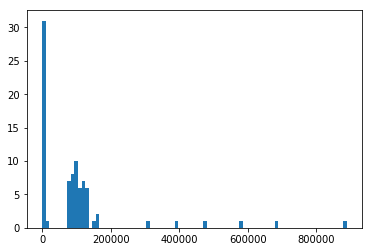

In [11]:
# Perform an assessment of how much missing data there is in each column of the
# dataset.
na_df = azdias.isnull().sum()
plt.hist(na_df, bins=85)

In [12]:
outlier_list = []
for column in azdias.columns:
    if azdias[column].isnull().sum() > 200000:
        outlier_list.append(column)
        
print(outlier_list)

['AGER_TYP', 'GEBURTSJAHR', 'TITEL_KZ', 'ALTER_HH', 'KK_KUNDENTYP', 'KBA05_BAUMAX']


In [13]:
na_df

AGER_TYP                 685843
ALTERSKATEGORIE_GROB       2881
ANREDE_KZ                     0
CJT_GESAMTTYP              4854
FINANZ_MINIMALIST             0
FINANZ_SPARER                 0
FINANZ_VORSORGER              0
FINANZ_ANLEGER                0
FINANZ_UNAUFFAELLIGER         0
FINANZ_HAUSBAUER              0
FINANZTYP                     0
GEBURTSJAHR              392318
GFK_URLAUBERTYP            4854
GREEN_AVANTGARDE              0
HEALTH_TYP               111196
LP_LEBENSPHASE_FEIN       97632
LP_LEBENSPHASE_GROB       94572
LP_FAMILIE_FEIN           77792
LP_FAMILIE_GROB           77792
LP_STATUS_FEIN             4854
LP_STATUS_GROB             4854
NATIONALITAET_KZ         108315
PRAEGENDE_JUGENDJAHRE    108164
RETOURTYP_BK_S             4854
SEMIO_SOZ                     0
SEMIO_FAM                     0
SEMIO_REL                     0
SEMIO_MAT                     0
SEMIO_VERT                    0
SEMIO_LUST                    0
                          ...  
OST_WEST

In [14]:
# Remove the outlier columns from the dataset. (You'll perform other data
# engineering tasks such as re-encoding and imputation later.)
azdias.drop(outlier_list, axis=1, inplace=True)

# remove them from the feat_info df as well
for column in outlier_list:
    feat_info.drop(feat_info[feat_info['attribute'] == column].index, inplace=True) 


(array([ 24.,   1.,   6.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   5.,   0.,   2.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   8.,   1.,   5.,   4.,   0.,   0.,   1.,   0.,   2.,
          3.,   0.,   0.,   7.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          6.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   2.]),
 array([      0.        ,    2000.81012658,    4001.62025316,
           6002.43037975,    8003.24050633,   10004.05063291,
          12004.86075949,   14005.67088608,   16006.48101266,
          18007.29113924,   20008.10126582,   22008.91139241,
          24009.72151899,   26010.53164557,   28011.34177215,
          30012.15189873,   32012.96202532,   34013.7721519 ,
          36014.58227848,   38015.39240506,   40016.20253165,
          42017.01265823, 

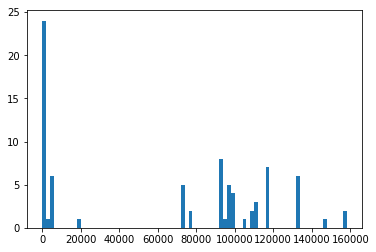

In [15]:
edited_na_df = azdias.isnull().sum()
plt.hist(edited_na_df, bins=79)

#### Discussion 1.1.2: Assess Missing Data in Each Column

The original histogram above has 85 bins (one for each feature). If each feature had a different number of missing values, I would expect to see 85 different height=1 bars. However, there are bars with frequenc > 1, which leads me to believe that there are features with the exact same missing values (or very close to one another). Looking at na_df above, it's very evident that there are certain features with the exact same missing values. Cross-referencing these features with the Data_Dictionary.md file shows us that some of the features are very closely related (e.g. (PLZ8_ANTG4, PLZ8_HHZ, PLZ8_GBZ...) and (KBA05_ANTG1, KBA05_ANTG2, ...) and so on). It is evident that these features share missing data values. If it seems that certain rows are all missing these same column values, we'll likely want to look into removing those rows.

Ultimately, I removed ['AGER_TYP', 'GEBURTSJAHR', 'TITEL_KZ', 'ALTER_HH', 'KK_KUNDENTYP', 'KBA05_BAUMAX'] from the dataframe.

#### Step 1.1.3: Assess Missing Data in Each Row

Now, you'll perform a similar assessment for the rows of the dataset. How much data is missing in each row? As with the columns, you should see some groups of points that have a very different numbers of missing values. Divide the data into two subsets: one for data points that are above some threshold for missing values, and a second subset for points below that threshold.

In order to know what to do with the outlier rows, we should see if the distribution of data values on columns that are not missing data (or are missing very little data) are similar or different between the two groups. Select at least five of these columns and compare the distribution of values.
- You can use seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) function to create a bar chart of code frequencies and matplotlib's [`subplot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html) function to put bar charts for the two subplots side by side.
- To reduce repeated code, you might want to write a function that can perform this comparison, taking as one of its arguments a column to be compared.

Depending on what you observe in your comparison, this will have implications on how you approach your conclusions later in the analysis. If the distributions of non-missing features look similar between the data with many missing values and the data with few or no missing values, then we could argue that simply dropping those points from the analysis won't present a major issue. On the other hand, if the data with many missing values looks very different from the data with few or no missing values, then we should make a note on those data as special. We'll revisit these data later on. **Either way, you should continue your analysis for now using just the subset of the data with few or no missing values.**

[43, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 47, 6, 8, 47, 8, 6, 47, 3, 0, 10, 0, 0, 8, 47, 5, 19, 0, 0, 2, 34, 0, 0, 0, 4, 43, 0, 0, 0, 5, 4, 0, 2, 0, 0, 0, 40, 0, 47, 0, 0, 0, 0, 43, 47, 0, 0, 0, 0, 0, 4, 43, 43, 0, 5, 0, 0, 0, 0, 47, 7, 0, 1, 8, 0, 47, 43, 0, 0, 0, 2, 45, 0, 43, 0, 0, 0, 0, 8, 4, 34, 0, 3, 0, 3, 0, 5, 47, 0, 47, 0, 0, 2, 47, 0, 0, 43, 0, 47, 43, 0, 0, 47, 0, 5, 0, 0, 0, 5, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 47, 0, 0, 4, 47, 29, 0, 0, 3, 17, 19, 47, 0, 0, 0, 0, 0, 0, 0, 0, 43, 47, 0, 8, 8, 16, 7, 0, 0, 5, 47, 0, 34, 0, 0, 47, 0, 0, 0, 0, 17, 0, 47, 17, 0, 19, 43, 0, 0, 0, 0, 10, 0, 5, 0, 0, 0, 0, 8, 0, 7, 0, 1, 3, 6, 0, 34, 0, 0, 8, 0, 0, 43, 0, 0, 2, 47, 47, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 47, 47, 34, 47, 0, 0, 43, 0, 2, 47, 43, 0, 47, 0, 0, 0, 0, 43, 5, 0, 0, 47, 0, 47, 0, 0, 0, 5, 10, 0, 0, 7, 0, 0, 0, 0, 0, 0, 6, 0, 2, 0, 15, 0, 0, 9, 0, 2, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 34, 0, 34, 0, 0, 8, 0, 0, 4, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5

(array([  3.71100000e+03,   4.36000000e+02,   5.20000000e+01,
          5.00000000e+01,   1.30000000e+01,   4.00000000e+00,
          1.00000000e+00,   1.02000000e+02,   1.00000000e+01,
          6.21000000e+02]),
 array([  0. ,   4.7,   9.4,  14.1,  18.8,  23.5,  28.2,  32.9,  37.6,
         42.3,  47. ]),
 <a list of 10 Patch objects>)

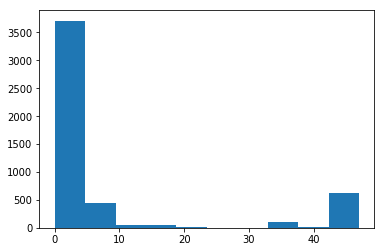

In [16]:
# How much data is missing in each row of the dataset?

# test with subset of the data first to observe the general frequency trends
missing_row_data = []
for i in range(5000):
    missing_row_data.append(azdias.iloc[i].isnull().sum())
print(missing_row_data)
plt.hist(missing_row_data)

It appears as though there is a breaking point for the data around 10 missing points per row. This will be our threshold.

In [17]:
# Write code to divide the data into two subsets based on the number of missing
# values in each row.
azdias_under10 = azdias[azdias.isnull().sum(axis=1) < 10]
azdias_over10 = azdias[azdias.isnull().sum(axis=1) >= 10]

In [18]:
# Compare the distribution of values for at least five columns where there are
# no or few missing values, between the two subsets.
azdias.isnull().sum().sort_values(ascending=True)[:40]

ZABEOTYP                     0
SEMIO_REL                    0
SEMIO_MAT                    0
SEMIO_VERT                   0
SEMIO_LUST                   0
SEMIO_ERL                    0
SEMIO_KULT                   0
SEMIO_RAT                    0
SEMIO_KRIT                   0
SEMIO_DOM                    0
SEMIO_KAEM                   0
GREEN_AVANTGARDE             0
SEMIO_PFLICHT                0
FINANZTYP                    0
FINANZ_HAUSBAUER             0
FINANZ_UNAUFFAELLIGER        0
FINANZ_ANLEGER               0
FINANZ_VORSORGER             0
FINANZ_SPARER                0
FINANZ_MINIMALIST            0
SEMIO_TRADV                  0
ANREDE_KZ                    0
SEMIO_SOZ                    0
SEMIO_FAM                    0
ALTERSKATEGORIE_GROB      2881
LP_STATUS_GROB            4854
LP_STATUS_FEIN            4854
ONLINE_AFFINITAET         4854
RETOURTYP_BK_S            4854
GFK_URLAUBERTYP           4854
CJT_GESAMTTYP             4854
HH_EINKOMMEN_SCORE       18348
SOHO_KZ 

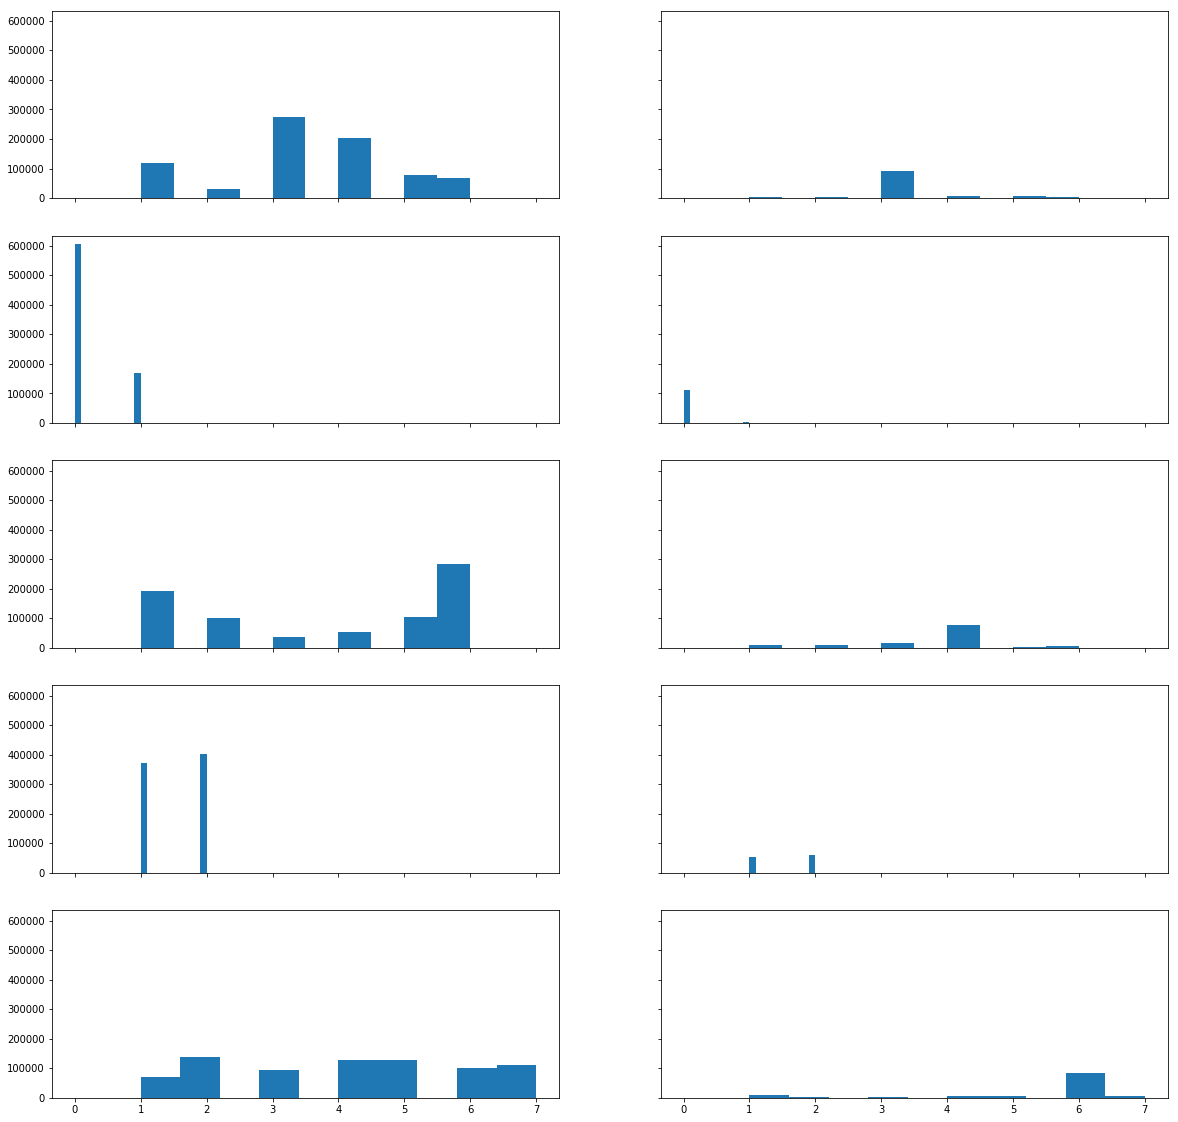

In [19]:
subset = [azdias_under10, azdias_over10]
fig, axs = plt.subplots(5, 2, sharex=True, sharey=True, figsize=(20,20))
for ax, subset in enumerate(subset):
    axs[0, ax].hist(subset['ZABEOTYP'])
    axs[1, ax].hist(subset['GREEN_AVANTGARDE'])
    axs[2, ax].hist(subset['FINANZTYP'])
    axs[3, ax].hist(subset['ANREDE_KZ'])
    axs[4, ax].hist(subset['SEMIO_FAM'])

#### Discussion 1.1.3: Assess Missing Data in Each Row

I generall observed that the majority of rows had values missing from 10 columns or less. I chose to use this as the breaking point to create subsets of data with rows missing less than 10 column values and those missing more than 10 values.

Additionally, comparing the distribution shapes of columns with no missing data for the two subsets shows similar % allocations to each category within those columns for either dataset.

### Step 1.2: Select and Re-Encode Features

Checking for missing data isn't the only way in which you can prepare a dataset for analysis. Since the unsupervised learning techniques to be used will only work on data that is encoded numerically, you need to make a few encoding changes or additional assumptions to be able to make progress. In addition, while almost all of the values in the dataset are encoded using numbers, not all of them represent numeric values. Check the third column of the feature summary (`feat_info`) for a summary of types of measurement.
- For numeric and interval data, these features can be kept without changes.
- Most of the variables in the dataset are ordinal in nature. While ordinal values may technically be non-linear in spacing, make the simplifying assumption that the ordinal variables can be treated as being interval in nature (that is, kept without any changes).
- Special handling may be necessary for the remaining two variable types: categorical, and 'mixed'.

In the first two parts of this sub-step, you will perform an investigation of the categorical and mixed-type features and make a decision on each of them, whether you will keep, drop, or re-encode each. Then, in the last part, you will create a new data frame with only the selected and engineered columns.

Data wrangling is often the trickiest part of the data analysis process, and there's a lot of it to be done here. But stick with it: once you're done with this step, you'll be ready to get to the machine learning parts of the project!

In [20]:
# How many features are there of each data type?
feat_info['type'].value_counts()

ordinal        49
categorical    18
numeric         6
mixed           6
Name: type, dtype: int64

#### Step 1.2.1: Re-Encode Categorical Features

For categorical data, you would ordinarily need to encode the levels as dummy variables. Depending on the number of categories, perform one of the following:
- For binary (two-level) categoricals that take numeric values, you can keep them without needing to do anything.
- There is one binary variable that takes on non-numeric values. For this one, you need to re-encode the values as numbers or create a dummy variable.
- For multi-level categoricals (three or more values), you can choose to encode the values using multiple dummy variables (e.g. via [OneHotEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)), or (to keep things straightforward) just drop them from the analysis. As always, document your choices in the Discussion section.

In [21]:
feat_info[feat_info['type'] == 'categorical']

,attribute,information_level,type,missing_or_unknown,NA_Values
2,ANREDE_KZ,person,categorical,"[-1,0]","[-1, 0]"
3,CJT_GESAMTTYP,person,categorical,[0],[0]
10,FINANZTYP,person,categorical,[-1],[-1]
12,GFK_URLAUBERTYP,person,categorical,[],[]
13,GREEN_AVANTGARDE,person,categorical,[],[]
17,LP_FAMILIE_FEIN,person,categorical,[0],[0]
18,LP_FAMILIE_GROB,person,categorical,[0],[0]
19,LP_STATUS_FEIN,person,categorical,[0],[0]
20,LP_STATUS_GROB,person,categorical,[0],[0]
21,NATIONALITAET_KZ,person,categorical,"[-1,0]","[-1, 0]"


In [22]:
# Assess categorical variables: which are binary, which are multi-level, and
# which one needs to be re-encoded?
cat_columns = feat_info[feat_info['type'] == 'categorical']['attribute']

In [23]:
cat_columns

2            ANREDE_KZ
3        CJT_GESAMTTYP
10           FINANZTYP
12     GFK_URLAUBERTYP
13    GREEN_AVANTGARDE
17     LP_FAMILIE_FEIN
18     LP_FAMILIE_GROB
19      LP_STATUS_FEIN
20      LP_STATUS_GROB
21    NATIONALITAET_KZ
38         SHOPPER_TYP
39             SOHO_KZ
41            VERS_TYP
42            ZABEOTYP
52         GEBAEUDETYP
55         OST_WEST_KZ
57     CAMEO_DEUG_2015
58      CAMEO_DEU_2015
Name: attribute, dtype: object

In [24]:
azdias_under10[cat_columns].head()

,ANREDE_KZ,CJT_GESAMTTYP,FINANZTYP,GFK_URLAUBERTYP,GREEN_AVANTGARDE,LP_FAMILIE_FEIN,LP_FAMILIE_GROB,LP_STATUS_FEIN,LP_STATUS_GROB,NATIONALITAET_KZ,SHOPPER_TYP,SOHO_KZ,VERS_TYP,ZABEOTYP,GEBAEUDETYP,OST_WEST_KZ,CAMEO_DEUG_2015,CAMEO_DEU_2015
1,2,5.0,1,10.0,0,5.0,3.0,2.0,1.0,1.0,3.0,1.0,2.0,5,8.0,W,8,8A
2,2,3.0,1,10.0,1,1.0,1.0,3.0,2.0,1.0,2.0,0.0,1.0,5,1.0,W,4,4C
3,2,2.0,6,1.0,0,NaN,NaN,9.0,4.0,1.0,1.0,0.0,1.0,3,1.0,W,2,2A
4,1,5.0,5,5.0,0,10.0,5.0,3.0,2.0,1.0,2.0,0.0,2.0,4,1.0,W,6,6B
5,2,2.0,2,1.0,0,1.0,1.0,4.0,2.0,1.0,0.0,0.0,2.0,4,1.0,W,8,8C


In [25]:
azdias_u10_cats = azdias_under10[cat_columns]

binary = []
multi_level = []

for column in azdias_u10_cats.columns:
    value_cts = azdias_u10_cats[column].value_counts()
    if len(value_cts) == 2:
        binary.append(column)
    elif len(value_cts) > 2:
        multi_level.append(column)
        
    print(column, '\n', value_cts)
print('Binary cats:', binary)
print('Multi-level cats:', multi_level)

ANREDE_KZ 
 2    403812
1    370931
Name: ANREDE_KZ, dtype: int64
CJT_GESAMTTYP 
 4.0    193259
3.0    143473
2.0    139489
5.0    108693
6.0     98633
1.0     91196
Name: CJT_GESAMTTYP, dtype: int64
FINANZTYP 
 6    285195
1    191084
5    103849
2    101570
4     54679
3     38366
Name: FINANZTYP, dtype: int64
GFK_URLAUBERTYP 
 12.0    125144
10.0    101073
8.0      81762
11.0     73750
5.0      69722
4.0      60075
9.0      55536
3.0      52779
1.0      50031
7.0      39915
2.0      39522
6.0      25434
Name: GFK_URLAUBERTYP, dtype: int64
GREEN_AVANTGARDE 
 0    604274
1    170469
Name: GREEN_AVANTGARDE, dtype: int64
LP_FAMILIE_FEIN 
 1.0     394341
10.0    127067
2.0      96071
11.0     48192
8.0      21300
7.0      18661
4.0      11237
5.0      10970
9.0      10278
6.0       7753
3.0       4395
Name: LP_FAMILIE_FEIN, dtype: int64
LP_FAMILIE_GROB 
 1.0    394341
5.0    185537
2.0     96071
4.0     47714
3.0     26602
Name: LP_FAMILIE_GROB, dtype: int64
LP_STATUS_FEIN 
 1.0     2046

A quick glance at printout, and it's clear that 'OST_WEST_KZ' is the non-numeric binary category. I'll need to re-encode this along with the multi-level category attributes. 

In [26]:
# Re-encode categorical variable(s) to be kept in the analysis.
azdias_under10['OST_WEST_KZ'] = azdias_under10['OST_WEST_KZ'].map({'O': 0, 'W': 1})

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [27]:
azdias_under10['OST_WEST_KZ']

1         1
2         1
3         1
4         1
5         1
6         1
7         1
8         1
9         1
10        1
12        1
13        1
15        1
16        1
18        1
19        1
21        1
22        1
23        1
25        1
27        1
28        1
29        1
31        1
32        1
33        1
34        1
36        1
37        1
38        1
         ..
891190    1
891191    1
891192    1
891193    1
891194    1
891195    1
891196    1
891197    1
891198    1
891199    1
891200    1
891201    1
891202    1
891204    1
891205    1
891206    1
891207    1
891208    1
891209    1
891210    1
891211    1
891212    1
891213    1
891214    1
891215    1
891216    1
891217    1
891218    1
891219    1
891220    1
Name: OST_WEST_KZ, Length: 774743, dtype: int64

In [28]:
# remove LP_FAMILIE_FEIN
# remove LP_STATUS_FEIN
# remove CAMEO_DEU_2015
# unsure as to whether I'll remove CAMEO_DEUG_2015 yet
azdias_under10.drop(['LP_FAMILIE_FEIN', 'LP_STATUS_FEIN', 'CAMEO_DEU_2015'], axis=1, inplace=True)
multi_level.remove('LP_FAMILIE_FEIN')
multi_level.remove('LP_STATUS_FEIN')
multi_level.remove('CAMEO_DEU_2015')
multi_level

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


['CJT_GESAMTTYP',
 'FINANZTYP',
 'GFK_URLAUBERTYP',
 'LP_FAMILIE_GROB',
 'LP_STATUS_GROB',
 'NATIONALITAET_KZ',
 'SHOPPER_TYP',
 'ZABEOTYP',
 'GEBAEUDETYP',
 'CAMEO_DEUG_2015']

In [29]:
# I noticed that GEBAEUDETYP had a value count of 1 for '5'. Let's remove that data point.
azdias_under10.drop(azdias_under10[azdias_under10['GEBAEUDETYP'] == 5].index, inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [30]:
for attribute in multi_level:
    dums = pd.get_dummies(azdias_under10[attribute], prefix=attribute)
    azdias_under10 = azdias_under10.drop(attribute, axis=1)
    azdias_under10 = azdias_under10.join(dums)

In [31]:
# check columns to see if dummies were created and original was dropped
azdias_under10.columns

Index(['ALTERSKATEGORIE_GROB', 'ANREDE_KZ', 'FINANZ_MINIMALIST',
       'FINANZ_SPARER', 'FINANZ_VORSORGER', 'FINANZ_ANLEGER',
       'FINANZ_UNAUFFAELLIGER', 'FINANZ_HAUSBAUER', 'GREEN_AVANTGARDE',
       'HEALTH_TYP',
       ...
       'GEBAEUDETYP_8.0', 'CAMEO_DEUG_2015_1', 'CAMEO_DEUG_2015_2',
       'CAMEO_DEUG_2015_3', 'CAMEO_DEUG_2015_4', 'CAMEO_DEUG_2015_5',
       'CAMEO_DEUG_2015_6', 'CAMEO_DEUG_2015_7', 'CAMEO_DEUG_2015_8',
       'CAMEO_DEUG_2015_9'],
      dtype='object', length=128)

#### Discussion 1.2.1: Re-Encode Categorical Features
To decide which variables to keep and drop, I first wrote a function to determine binary vs. multi-level categorical variables. From there, I was able to reference the Data Dictionary doc to help in choosing which variables to keep and which to drop. I chose to keep categorical variables that seemed to be unique, whereas there were a number of other categorical variables that seemed to already be represented by other variables in the dataset. Ultimately, I dropped ['LP_FAMILIE_FEIN', 'LP_STATUS_FEIN', 'CAMEO_DEU_2015']. I transformed OST_WEST_KZ into a binary numerical variable. The rest of the categorical variables were transformed into dummy variables.

#### Step 1.2.2: Engineer Mixed-Type Features

There are a handful of features that are marked as "mixed" in the feature summary that require special treatment in order to be included in the analysis. There are two in particular that deserve attention; the handling of the rest are up to your own choices:
- "PRAEGENDE_JUGENDJAHRE" combines information on three dimensions: generation by decade, movement (mainstream vs. avantgarde), and nation (east vs. west). While there aren't enough levels to disentangle east from west, you should create two new variables to capture the other two dimensions: an interval-type variable for decade, and a binary variable for movement.
- "CAMEO_INTL_2015" combines information on two axes: wealth and life stage. Break up the two-digit codes by their 'tens'-place and 'ones'-place digits into two new ordinal variables (which, for the purposes of this project, is equivalent to just treating them as their raw numeric values).
- If you decide to keep or engineer new features around the other mixed-type features, make sure you note your steps in the Discussion section.

Be sure to check `Data_Dictionary.md` for the details needed to finish these tasks.

From Data_Dictionary.md

### 1.18. PRAEGENDE_JUGENDJAHRE
Dominating movement of person's youth (avantgarde vs. mainstream; east vs. west)
- -1: unknown
-  0: unknown
-  1: 40s - war years (Mainstream, E+W)
-  2: 40s - reconstruction years (Avantgarde, E+W)
-  3: 50s - economic miracle (Mainstream, E+W)
-  4: 50s - milk bar / Individualisation (Avantgarde, E+W)
-  5: 60s - economic miracle (Mainstream, E+W)
-  6: 60s - generation 68 / student protestors (Avantgarde, W)
-  7: 60s - opponents to the building of the Wall (Avantgarde, E)
-  8: 70s - family orientation (Mainstream, E+W)
-  9: 70s - peace movement (Avantgarde, E+W)
- 10: 80s - Generation Golf (Mainstream, W)
- 11: 80s - ecological awareness (Avantgarde, W)
- 12: 80s - FDJ / communist party youth organisation (Mainstream, E)
- 13: 80s - Swords into ploughshares (Avantgarde, E)
- 14: 90s - digital media kids (Mainstream, E+W)
- 15: 90s - ecological awareness (Avantgarde, E+W)

In [32]:
# Investigate "PRAEGENDE_JUGENDJAHRE" and engineer two new variables.

with open('Data_Dictionary.md') as f:
    praeg_file_split = [line for line in f]
    
# looking at md file, need indices 241 to 259
praeg_line_list = praeg_file_split[241:260]

# get rid of headers
praeg_line_list = praeg_line_list[4:]

# remove leading '-  #: ', where # is integer mapping
praeg_line_list = [i[6:] for i in praeg_line_list]

# remove trailing characters up to the tail of Mainstream or Avantgarde
praeg_line_list = [i.split(',') for i in praeg_line_list]
praeg_line_list

[['40s - war years (Mainstream', ' E+W)\n'],
 ['40s - reconstruction years (Avantgarde', ' E+W)\n'],
 ['50s - economic miracle (Mainstream', ' E+W)\n'],
 ['50s - milk bar / Individualisation (Avantgarde', ' E+W)\n'],
 ['60s - economic miracle (Mainstream', ' E+W)\n'],
 ['60s - generation 68 / student protestors (Avantgarde', ' W)\n'],
 ['60s - opponents to the building of the Wall (Avantgarde', ' E)\n'],
 ['70s - family orientation (Mainstream', ' E+W)\n'],
 ['70s - peace movement (Avantgarde', ' E+W)\n'],
 ['80s - Generation Golf (Mainstream', ' W)\n'],
 ['80s - ecological awareness (Avantgarde', ' W)\n'],
 ['80s - FDJ / communist party youth organisation (Mainstream', ' E)\n'],
 ['80s - Swords into ploughshares (Avantgarde', ' E)\n'],
 ['90s - digital media kids (Mainstream', ' E+W)\n'],
 ['90s - ecological awareness (Avantgarde', ' E+W)\n']]

In [33]:
# map decade and movement dictionaries
praeg_dec_dict = {}
praeg_move_dict = {}

for i, line in enumerate(praeg_line_list):
    if line[0][-10:] == 'Mainstream':
        x = 0
    elif line[0][-10:] == 'Avantgarde':
        x = 1
    praeg_move_dict[i+1] = x
    praeg_dec_dict[i+1] = int(line[0][:2])
    
print(praeg_dec_dict)
print(praeg_move_dict)

{1: 40, 2: 40, 3: 50, 4: 50, 5: 60, 6: 60, 7: 60, 8: 70, 9: 70, 10: 80, 11: 80, 12: 80, 13: 80, 14: 90, 15: 90}
{1: 0, 2: 1, 3: 0, 4: 1, 5: 0, 6: 1, 7: 1, 8: 0, 9: 1, 10: 0, 11: 1, 12: 0, 13: 1, 14: 0, 15: 1}


In [34]:
# create new columsn in azdias_under10 with Praeg Decade and Movement values
azdias_under10['PRAEG_DECADE'] = azdias_under10['PRAEGENDE_JUGENDJAHRE'].map(praeg_dec_dict)
azdias_under10['PRAEG_MOVEMENT'] = azdias_under10['PRAEGENDE_JUGENDJAHRE'].map(praeg_move_dict)

In [35]:
# drop the original Praeg column
azdias_under10.drop('PRAEGENDE_JUGENDJAHRE', axis=1, inplace=True)

In [36]:
# Investigate "CAMEO_INTL_2015" and engineer two new variables
with open('Data_Dictionary.md') as f:
    cameo_file_split = [line for line in f]

# grab the indices that matter from the Data Dictionary
cameo_line_list = cameo_file_split[553:578]

# remove leading non-numeric space
cameo_line_list = [i[2:] for i in cameo_line_list]

# empty dicts for mapping
cameo_wealth_dict = {}
cameo_life_stage_dict = {}

# add to each dict where:
# the ten's digit maps to the ID for the cameo_wealth dict
# the one's digit maps to the ID for the life_stage dict
for line in cameo_line_list:
    cameo_wealth_dict[line[:2]] = int(line[0])
    cameo_life_stage_dict[line[:2]] = int(line[1])
    
print(cameo_wealth_dict)
print(cameo_life_stage_dict)

{'11': 1, '12': 1, '13': 1, '14': 1, '15': 1, '21': 2, '22': 2, '23': 2, '24': 2, '25': 2, '31': 3, '32': 3, '33': 3, '34': 3, '35': 3, '41': 4, '42': 4, '43': 4, '44': 4, '45': 4, '51': 5, '52': 5, '53': 5, '54': 5, '55': 5}
{'11': 1, '12': 2, '13': 3, '14': 4, '15': 5, '21': 1, '22': 2, '23': 3, '24': 4, '25': 5, '31': 1, '32': 2, '33': 3, '34': 4, '35': 5, '41': 1, '42': 2, '43': 3, '44': 4, '45': 5, '51': 1, '52': 2, '53': 3, '54': 4, '55': 5}


In [37]:
# create new CAMEO columns related to Wealth and Life Stage from CAMEO_INTL_2015
azdias_under10['CAMEO_WEALTH'] = azdias_under10['CAMEO_INTL_2015'].map(cameo_wealth_dict)
azdias_under10['CAMEO_LIFE_STAGE'] = azdias_under10['CAMEO_INTL_2015'].map(cameo_life_stage_dict)

In [38]:
# drop the CAMEO_INTL_2015 column
azdias_under10.drop('CAMEO_INTL_2015', axis=1, inplace=True)

In [39]:
# Any other mixture features we care about?

In [40]:
feat_info[feat_info['type'] == 'mixed']

,attribute,information_level,type,missing_or_unknown,NA_Values
15,LP_LEBENSPHASE_FEIN,person,mixed,[0],[0]
16,LP_LEBENSPHASE_GROB,person,mixed,[0],[0]
22,PRAEGENDE_JUGENDJAHRE,person,mixed,"[-1,0]","[-1, 0]"
56,WOHNLAGE,building,mixed,[-1],[-1]
59,CAMEO_INTL_2015,microcell_rr4,mixed,"[-1,XX]","[-1, XX]"
79,PLZ8_BAUMAX,macrocell_plz8,mixed,"[-1,0]","[-1, 0]"


In [41]:
azdias_under10['WOHNLAGE'].head()

1    4.0
2    2.0
3    7.0
4    3.0
5    7.0
Name: WOHNLAGE, dtype: float64

LP_... are life stage variables. We can drop those now that we've pulled that out of CAMEO_INTIL_2015.
WOHNLAGE: I'd like to keep neighborhood quality (1 through 5). I'll get rid of "rural neighborhood" and "new building in rural neighborhood". Let's take a look at the distribution of values first...
Drop PLZ8_BAUMAX since we can get this information from other PLZ8 feature tags if we need it.

In [42]:
azdias_under10['WOHNLAGE'].value_counts()

3.0    244502
7.0    165983
4.0    133115
2.0     98105
5.0     72346
1.0     42859
8.0     14891
0.0      2941
Name: WOHNLAGE, dtype: int64

Too many 7s (not a neighborhood quality value I'd keep) for my liking....we'd have a lot of missing data. I'll just toss this column, and reincorporate later if I really want to look at it

In [43]:
azdias_under10.drop(['LP_LEBENSPHASE_FEIN', 'LP_LEBENSPHASE_GROB', 'WOHNLAGE', 'PLZ8_BAUMAX'], axis=1, inplace=True)

#### Discussion 1.2.2: Engineer Mixed-Type Features

First, I transformed the PRAEGENDE_JUGENDJAHRE variable to two new columns: Decade and Movement. Second, I mapped the CAMEO_INTL_2015 variable to two new columns: Wealth and Life Stage. I further looked at the other mixed variables, and as previously stated, LP_... are life stage variables. We can drop those now that we've pulled that out of CAMEO_INTIL_2015. WOHNLAGE: I'd like to keep neighborhood quality (1 through 5). I'll get rid of "rural neighborhood" and "new building in rural neighborhood". Let's take a look at the distribution of values first... Drop PLZ8_BAUMAX since we can get this information from other PLZ8 feature tags if we need it. There were too many 7s in WOHNLAGE which would have been a large proportion of the column data in general, so I ended up removing that row as well.

In all, I additionally dropped the following columns: ['LP_LEBENSPHASE_FEIN', 'LP_LEBENSPHASE_GROB', 'WOHNLAGE', 'PLZ8_BAUMAX'].

#### Step 1.2.3: Complete Feature Selection

In order to finish this step up, you need to make sure that your data frame now only has the columns that you want to keep. To summarize, the dataframe should consist of the following:
- All numeric, interval, and ordinal type columns from the original dataset.
- Binary categorical features (all numerically-encoded).
- Engineered features from other multi-level categorical features and mixed features.

Make sure that for any new columns that you have engineered, that you've excluded the original columns from the final dataset. Otherwise, their values will interfere with the analysis later on the project. For example, you should not keep "PRAEGENDE_JUGENDJAHRE", since its values won't be useful for the algorithm: only the values derived from it in the engineered features you created should be retained. As a reminder, your data should only be from **the subset with few or no missing values**.

In [44]:
# If there are other re-engineering tasks you need to perform, make sure you
# take care of them here. (Dealing with missing data will come in step 2.1.)
azdias_under10.dtypes[:50]

ALTERSKATEGORIE_GROB     float64
ANREDE_KZ                  int64
FINANZ_MINIMALIST          int64
FINANZ_SPARER              int64
FINANZ_VORSORGER           int64
FINANZ_ANLEGER             int64
FINANZ_UNAUFFAELLIGER      int64
FINANZ_HAUSBAUER           int64
GREEN_AVANTGARDE           int64
HEALTH_TYP               float64
RETOURTYP_BK_S           float64
SEMIO_SOZ                  int64
SEMIO_FAM                  int64
SEMIO_REL                  int64
SEMIO_MAT                  int64
SEMIO_VERT                 int64
SEMIO_LUST                 int64
SEMIO_ERL                  int64
SEMIO_KULT                 int64
SEMIO_RAT                  int64
SEMIO_KRIT                 int64
SEMIO_DOM                  int64
SEMIO_KAEM                 int64
SEMIO_PFLICHT              int64
SEMIO_TRADV                int64
SOHO_KZ                  float64
VERS_TYP                 float64
ANZ_PERSONEN             float64
ANZ_TITEL                float64
HH_EINKOMMEN_SCORE       float64
W_KEIT_KIN

In [45]:
azdias_under10.dtypes[51:100]

PLZ8_ANTG1              float64
PLZ8_ANTG2              float64
PLZ8_ANTG3              float64
PLZ8_ANTG4              float64
PLZ8_HHZ                float64
PLZ8_GBZ                float64
ARBEIT                  float64
ORTSGR_KLS9             float64
RELAT_AB                float64
CJT_GESAMTTYP_1.0         uint8
CJT_GESAMTTYP_2.0         uint8
CJT_GESAMTTYP_3.0         uint8
CJT_GESAMTTYP_4.0         uint8
CJT_GESAMTTYP_5.0         uint8
CJT_GESAMTTYP_6.0         uint8
FINANZTYP_1               uint8
FINANZTYP_2               uint8
FINANZTYP_3               uint8
FINANZTYP_4               uint8
FINANZTYP_5               uint8
FINANZTYP_6               uint8
GFK_URLAUBERTYP_1.0       uint8
GFK_URLAUBERTYP_2.0       uint8
GFK_URLAUBERTYP_3.0       uint8
GFK_URLAUBERTYP_4.0       uint8
GFK_URLAUBERTYP_5.0       uint8
GFK_URLAUBERTYP_6.0       uint8
GFK_URLAUBERTYP_7.0       uint8
GFK_URLAUBERTYP_8.0       uint8
GFK_URLAUBERTYP_9.0       uint8
GFK_URLAUBERTYP_10.0      uint8
GFK_URLA

In [46]:
azdias_under10.dtypes[101:]

ZABEOTYP_1             uint8
ZABEOTYP_2             uint8
ZABEOTYP_3             uint8
ZABEOTYP_4             uint8
ZABEOTYP_5             uint8
ZABEOTYP_6             uint8
GEBAEUDETYP_1.0        uint8
GEBAEUDETYP_2.0        uint8
GEBAEUDETYP_3.0        uint8
GEBAEUDETYP_4.0        uint8
GEBAEUDETYP_6.0        uint8
GEBAEUDETYP_8.0        uint8
CAMEO_DEUG_2015_1      uint8
CAMEO_DEUG_2015_2      uint8
CAMEO_DEUG_2015_3      uint8
CAMEO_DEUG_2015_4      uint8
CAMEO_DEUG_2015_5      uint8
CAMEO_DEUG_2015_6      uint8
CAMEO_DEUG_2015_7      uint8
CAMEO_DEUG_2015_8      uint8
CAMEO_DEUG_2015_9      uint8
PRAEG_DECADE         float64
PRAEG_MOVEMENT       float64
CAMEO_WEALTH         float64
CAMEO_LIFE_STAGE     float64
dtype: object

In [47]:
# Do whatever you need to in order to ensure that the dataframe only contains
# the columns that should be passed to the algorithm functions.

### Step 1.3: Create a Cleaning Function

Even though you've finished cleaning up the general population demographics data, it's important to look ahead to the future and realize that you'll need to perform the same cleaning steps on the customer demographics data. In this substep, complete the function below to execute the main feature selection, encoding, and re-engineering steps you performed above. Then, when it comes to looking at the customer data in Step 3, you can just run this function on that DataFrame to get the trimmed dataset in a single step.

In [48]:
def clean_data(df):
    """
    Perform feature trimming, re-encoding, and engineering for demographics
    data
    
    INPUT: Demographics DataFrame
    OUTPUT: Trimmed and cleaned demographics DataFrame
    """
    
    # Put in code here to execute all main cleaning steps:  
    # replace unknown/missing values in df with NaN
    
    feat_info = pd.read_csv('AZDIAS_Feature_Summary.csv', delimiter=';')
    
    NA_list = []
    # create empty column in feat_info to put list of NA_values
    feat_info['NA_Values'] = ''

    # translate string of values in feat_info['missing_or_unknown']
    # into usable list of values
    for i in range(feat_info.shape[0]):
        x = feat_info['missing_or_unknown'][i]
        x = x[1:-1].split(',')
        for item in x:
            try:
                x = int(item)
            except:
                x = item
            NA_list.append(x)
        feat_info['NA_Values'][i] = NA_list
        NA_list = []
    
    for index, row in feat_info.iterrows():
        attribute = feat_info.loc[index, 'attribute']
        for item in feat_info['NA_Values'][index]:
            # convert every "item" value in df[attribute] to np.nan
            df.replace({attribute: item}, np.nan, inplace=True)
    
    # Remove the outlier columns from the dataset. (You'll perform other data
    # engineering tasks such as re-encoding and imputation later.)
    outlier_list = ['AGER_TYP', 'GEBURTSJAHR', 'TITEL_KZ', 'ALTER_HH', 'KK_KUNDENTYP', 'KBA05_BAUMAX']
    df.drop(outlier_list, axis=1, inplace=True)
    # remove them from the feat_info df as well
    for column in outlier_list:
        feat_info.drop(feat_info[feat_info['attribute'] == column].index, inplace=True) 
    
    # Write code to divide the data into two subsets based on the number of missing
    # values in each row.
    df_under10 = df[df.isnull().sum(axis=1) < 10]

    # Re-encode categorical variable(s) to be kept in the analysis.
    cat_columns = feat_info[feat_info['type'] == 'categorical']['attribute']
    df_u10_cats = df_under10[cat_columns]

    binary = []
    multi_level = []

    for column in df_u10_cats.columns:
        value_cts = df_u10_cats[column].value_counts()
        if len(value_cts) == 2:
            binary.append(column)
        elif len(value_cts) > 2:
            multi_level.append(column)

    df_under10['OST_WEST_KZ'] = df_under10['OST_WEST_KZ'].map({'O': 0, 'W': 1})

    # drop these unneeded category-type columns
    df_under10.drop(['LP_FAMILIE_FEIN', 'LP_STATUS_FEIN', 'CAMEO_DEU_2015'], axis=1, inplace=True)
    
    # remove them from the multi_level list
    multi_level.remove('LP_FAMILIE_FEIN')
    multi_level.remove('LP_STATUS_FEIN')
    multi_level.remove('CAMEO_DEU_2015')
    
    # loop through the multi_level list to generate dummy variables for remaining multi_level category attributes
    for attribute in multi_level:
        dums = pd.get_dummies(df_under10[attribute], prefix=attribute)
        df_under10 = df_under10.drop(attribute, axis=1)
        df_under10 = df_under10.join(dums)

    # map 'PRAEGENDE_JUGENDJAHRE' to two columns
    praeg_dec_dict = {1: 40, 2: 40, 3: 50, 4: 50, 5: 60, 6: 60, 7: 60, 8: 70, 9: 70, 10: 80, 11: 80, 12: 80, 13: 80, 14: 90, 15: 90}
    praeg_move_dict = {1: 0, 2: 1, 3: 0, 4: 1, 5: 0, 6: 1, 7: 1, 8: 0, 9: 1, 10: 0, 11: 1, 12: 0, 13: 1, 14: 0, 15: 1}
    
    df_under10['PRAEG_DECADE'] = df_under10['PRAEGENDE_JUGENDJAHRE'].map(praeg_dec_dict)
    df_under10['PRAEG_MOVEMENT'] = df_under10['PRAEGENDE_JUGENDJAHRE'].map(praeg_move_dict)

    # get rid of PRAEGENDE_JUGENDJAHRE column
    df_under10.drop('PRAEGENDE_JUGENDJAHRE', axis=1, inplace=True)
    
    # map 'CAMEO_INTL_2015' to two columns
    cameo_wealth_dict = {'11': 1, '12': 1, '13': 1, '14': 1, '15': 1, '21': 2, '22': 2, '23': 2,
                      '24': 2, '25': 2, '31': 3, '32': 3, '33': 3, '34': 3, '35': 3, '41': 4,
                      '42': 4, '43': 4, '44': 4, '45': 4, '51': 5, '52': 5, '53': 5, '54': 5, '55': 5}
    cameo_life_stage_dict = {'11': 1, '12': 2, '13': 3, '14': 4, '15': 5, '21': 1, '22': 2, '23': 3,
                       '24': 4, '25': 5, '31': 1, '32': 2, '33': 3, '34': 4, '35': 5, '41': 1,
                       '42': 2, '43': 3, '44': 4, '45': 5, '51': 1, '52': 2, '53': 3, '54': 4, '55': 5}
    
    df_under10['CAMEO_WEALTH'] = df_under10['CAMEO_INTL_2015'].map(cameo_wealth_dict)
    df_under10['CAMEO_LIFE_STAGE'] = df_under10['CAMEO_INTL_2015'].map(cameo_life_stage_dict)

    # drop the CAMEO_INTL_2015 column
    df_under10.drop('CAMEO_INTL_2015', axis=1, inplace=True)

    # drop remaining mixed variable 
    df_under10.drop(['LP_LEBENSPHASE_FEIN', 'LP_LEBENSPHASE_GROB', 'WOHNLAGE', 'PLZ8_BAUMAX'], axis=1, inplace=True)
    
    return df_under10

## Step 2: Feature Transformation

### Step 2.1: Apply Feature Scaling

Before we apply dimensionality reduction techniques to the data, we need to perform feature scaling so that the principal component vectors are not influenced by the natural differences in scale for features. Starting from this part of the project, you'll want to keep an eye on the [API reference page for sklearn](http://scikit-learn.org/stable/modules/classes.html) to help you navigate to all of the classes and functions that you'll need. In this substep, you'll need to check the following:

- sklearn requires that data not have missing values in order for its estimators to work properly. So, before applying the scaler to your data, make sure that you've cleaned the DataFrame of the remaining missing values. This can be as simple as just removing all data points with missing data, or applying an [Imputer](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Imputer.html) to replace all missing values. You might also try a more complicated procedure where you temporarily remove missing values in order to compute the scaling parameters before re-introducing those missing values and applying imputation. Think about how much missing data you have and what possible effects each approach might have on your analysis, and justify your decision in the discussion section below.
- For the actual scaling function, a [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) instance is suggested, scaling each feature to mean 0 and standard deviation 1.
- For these classes, you can make use of the `.fit_transform()` method to both fit a procedure to the data as well as apply the transformation to the data at the same time. Don't forget to keep the fit sklearn objects handy, since you'll be applying them to the customer demographics data towards the end of the project.

In [49]:
# If you've not yet cleaned the dataset of all NaN values, then investigate and
# do that now.
azdias_under10.isnull().sum().sum()

510438

In [50]:
azdias_under10.isnull().sum().sort_values()

CJT_GESAMTTYP_3.0           0
FINANZTYP_5                 0
FINANZTYP_4                 0
FINANZTYP_3                 0
FINANZTYP_2                 0
FINANZTYP_1                 0
CJT_GESAMTTYP_6.0           0
CJT_GESAMTTYP_5.0           0
CJT_GESAMTTYP_4.0           0
SHOPPER_TYP_1.0             0
FINANZTYP_6                 0
CJT_GESAMTTYP_2.0           0
SHOPPER_TYP_2.0             0
SHOPPER_TYP_3.0             0
ZABEOTYP_1                  0
ZABEOTYP_2                  0
ZABEOTYP_3                  0
ZABEOTYP_4                  0
ZABEOTYP_5                  0
ZABEOTYP_6                  0
GEBAEUDETYP_1.0             0
CJT_GESAMTTYP_1.0           0
GFK_URLAUBERTYP_1.0         0
GFK_URLAUBERTYP_2.0         0
GFK_URLAUBERTYP_3.0         0
NATIONALITAET_KZ_2.0        0
NATIONALITAET_KZ_1.0        0
LP_STATUS_GROB_5.0          0
LP_STATUS_GROB_4.0          0
LP_STATUS_GROB_3.0          0
                        ...  
EWDICHTE                  526
INNENSTADT                526
ALTERSKATE

In [51]:
# calculate % of data we'd lose by dropping all missing value rows from the column with the most missing values
55257/774743

0.07132300646795131

In [52]:
df = azdias_under10.dropna()
df.shape

(623210, 126)

In [53]:
# how much data did we lose
1 - 623211/774743

0.19559002146518267

In [54]:
# seems too high
# let's get rid of the small (<1% of total row length) missing values
for column in azdias_under10.columns:
    if azdias_under10[column].isnull().sum() < 7784:
        azdias_under10.dropna(subset=[column], inplace=True)

In [55]:
azdias_under10.isnull().sum().sort_values()

ALTERSKATEGORIE_GROB        0
LP_STATUS_GROB_2.0          0
LP_STATUS_GROB_1.0          0
LP_FAMILIE_GROB_5.0         0
LP_FAMILIE_GROB_4.0         0
LP_FAMILIE_GROB_3.0         0
LP_FAMILIE_GROB_2.0         0
LP_FAMILIE_GROB_1.0         0
GFK_URLAUBERTYP_12.0        0
GFK_URLAUBERTYP_11.0        0
GFK_URLAUBERTYP_10.0        0
GFK_URLAUBERTYP_9.0         0
GFK_URLAUBERTYP_8.0         0
GFK_URLAUBERTYP_7.0         0
GFK_URLAUBERTYP_6.0         0
GFK_URLAUBERTYP_5.0         0
GFK_URLAUBERTYP_4.0         0
GFK_URLAUBERTYP_3.0         0
GFK_URLAUBERTYP_2.0         0
GFK_URLAUBERTYP_1.0         0
FINANZTYP_6                 0
FINANZTYP_5                 0
FINANZTYP_4                 0
FINANZTYP_3                 0
FINANZTYP_2                 0
FINANZTYP_1                 0
CJT_GESAMTTYP_6.0           0
CJT_GESAMTTYP_5.0           0
LP_STATUS_GROB_3.0          0
CJT_GESAMTTYP_4.0           0
                        ...  
PLZ8_ANTG3                  0
GEBAEUDETYP_RASTER          0
INNENSTADT

In [56]:
# impute remaining missing values
from sklearn.preprocessing import Imputer

azdias_u10_imp = Imputer(missing_values='NaN', strategy='most_frequent')
azdias_under10 = pd.DataFrame(azdias_u10_imp.fit_transform(azdias_under10),
                             columns=azdias_under10.columns,
                             index=azdias_under10.index)

In [57]:
azdias_under10.shape

(750418, 126)

In [58]:
azdias_under10.isnull().sum().sum()

0

In [59]:
# Apply feature scaling to the general population demographics data.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_arr = scaler.fit_transform(azdias_under10)
scaled_df = pd.DataFrame(scaled_arr, columns=azdias_under10.columns, index=azdias_under10.index)
scaled_df

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,...,CAMEO_DEUG_2015_4,CAMEO_DEUG_2015_5,CAMEO_DEUG_2015_6,CAMEO_DEUG_2015_7,CAMEO_DEUG_2015_8,CAMEO_DEUG_2015_9,PRAEG_DECADE,PRAEG_MOVEMENT,CAMEO_WEALTH,CAMEO_LIFE_STAGE
1,-1.760771,0.957891,-1.485221,1.538257,-1.044039,1.471744,0.981368,1.322440,-0.531497,1.008517,...,-0.386662,-0.271326,-0.393616,-0.331084,2.188983,-0.400285,1.103165,-0.531497,1.175949,-1.256634
2,0.202358,0.957891,-1.485221,0.865119,-1.770335,-0.567913,0.263388,1.322440,1.881476,1.008517,...,2.586239,-0.271326,-0.393616,-0.331084,-0.456833,-0.400285,1.103165,1.881476,-0.870101,0.759084
3,1.183922,0.957891,0.697554,-0.481156,1.134851,-0.567913,-1.172572,-0.820776,-0.531497,-0.314313,...,-0.386662,-0.271326,-0.393616,-0.331084,-0.456833,-0.400285,-0.264303,-0.531497,-1.552118,-0.584728
4,0.202358,-1.043960,0.697554,0.191981,0.408554,-1.247798,0.263388,-0.820776,-0.531497,1.008517,...,-0.386662,-0.271326,2.540548,-0.331084,-0.456833,-0.400285,-0.264303,-0.531497,0.493932,0.087178
5,-1.760771,0.957891,-0.030038,-1.154294,1.134851,-0.567913,-0.454592,1.322440,-0.531497,1.008517,...,-0.386662,-0.271326,-0.393616,-0.331084,2.188983,-0.400285,-1.631771,-0.531497,1.175949,0.759084
6,-0.779207,0.957891,-1.485221,1.538257,-1.770335,1.471744,0.981368,-0.106371,-0.531497,-0.314313,...,2.586239,-0.271326,-0.393616,-0.331084,-0.456833,-0.400285,0.419431,-0.531497,-0.870101,-0.584728
7,-1.760771,-1.043960,-0.030038,0.191981,0.408554,-1.247798,0.263388,-0.820776,-0.531497,-1.637143,...,-0.386662,-0.271326,-0.393616,-0.331084,-0.456833,-0.400285,-0.264303,-0.531497,-1.552118,0.759084
8,0.202358,-1.043960,0.697554,0.865119,-1.044039,0.791858,-0.454592,-0.820776,1.881476,1.008517,...,-0.386662,-0.271326,-0.393616,-0.331084,-0.456833,-0.400285,0.419431,1.881476,-1.552118,0.087178
9,0.202358,0.957891,-0.757629,0.865119,-1.044039,0.111973,1.699349,0.608034,1.881476,-0.314313,...,-0.386662,-0.271326,-0.393616,-0.331084,-0.456833,-0.400285,1.103165,1.881476,-1.552118,1.430991
10,0.202358,0.957891,-0.757629,-0.481156,1.134851,0.111973,-1.172572,1.322440,-0.531497,-0.314313,...,-0.386662,-0.271326,-0.393616,-0.331084,-0.456833,2.498221,-1.631771,-0.531497,1.175949,-1.256634


### Discussion 2.1: Apply Feature Scaling

As stated above, I sorted the df by null values. Looking at the quantities in each column, I determined there were a number of columns with very minimal amounts of null values. I chose to drop those rows. I looked at dropping rows from some of the higher % missing data columns, but decided that I'd lose too much of my dataset if I did that (~20%). Thus, I chose to impute those NaN values by using and Imputer with a 'most_frequent' strategy to fill in NaN with the mode of each column.

From there, I then scaled the df using a StandardScaler to get columns with mean 0 and standard deviation 1.

### Step 2.2: Perform Dimensionality Reduction

On your scaled data, you are now ready to apply dimensionality reduction techniques.

- Use sklearn's [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) class to apply principal component analysis on the data, thus finding the vectors of maximal variance in the data. To start, you should not set any parameters (so all components are computed) or set a number of components that is at least half the number of features (so there's enough features to see the general trend in variability).
- Check out the ratio of variance explained by each principal component as well as the cumulative variance explained. Try plotting the cumulative or sequential values using matplotlib's [`plot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) function. Based on what you find, select a value for the number of transformed features you'll retain for the clustering part of the project.
- Once you've made a choice for the number of components to keep, make sure you re-fit a PCA instance to perform the decided-on transformation.

In [60]:
# Apply PCA to the data.
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(scaled_df)
print(pca.explained_variance_ratio_)

[  1.11123340e-01   8.54989147e-02   5.41803618e-02   3.50176691e-02
   2.48213358e-02   2.01592707e-02   1.91526273e-02   1.75592069e-02
   1.61933189e-02   1.56389487e-02   1.49269622e-02   1.43789825e-02
   1.32840752e-02   1.28657911e-02   1.22265252e-02   1.17863291e-02
   1.16038061e-02   1.12066881e-02   1.09144539e-02   1.06838036e-02
   1.06392205e-02   1.03004222e-02   1.01499821e-02   1.00664743e-02
   9.98237504e-03   9.97582208e-03   9.69413908e-03   9.50916679e-03
   9.45864559e-03   9.29733268e-03   9.21915197e-03   9.18649968e-03
   9.09696012e-03   9.02597692e-03   8.96720052e-03   8.89440125e-03
   8.77990854e-03   8.66881356e-03   8.63863255e-03   8.54413400e-03
   8.48491667e-03   8.44670349e-03   8.39739728e-03   8.36069283e-03
   8.29188613e-03   8.15207486e-03   8.13689033e-03   8.03148571e-03
   7.90236181e-03   7.77302564e-03   7.72816978e-03   7.63367140e-03
   7.48949296e-03   7.36344647e-03   7.16629610e-03   6.86278988e-03
   6.82572742e-03   6.61651175e-03

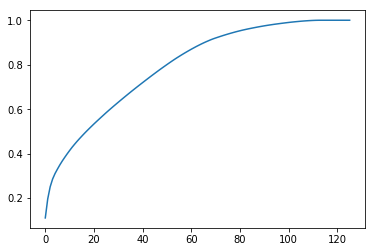

In [61]:
# Investigate the variance accounted for by each principal component.
plt.plot(np.cumsum(pca.explained_variance_ratio_))

Looks like greater than 80% of the variance is explained with the top 60 components.

In [62]:
pca.explained_variance_ratio_[:60].sum()

0.86372318398360759

In [63]:
# Re-apply PCA to the data while selecting for number of components to retain.
pca = PCA(n_components=60)
pca_scores = pca.fit_transform(scaled_df)
print(pca.explained_variance_ratio_.sum())

0.863261503578


### Discussion 2.2: Perform Dimensionality Reduction

After transforming the original scaled df with components for each column, I noticed an inflection point around 60 components that captured approximately 80 to 85% of the variance in the data. Thus, I chose to build another pca object using 60 components. As expected, this pca object explains approximately 86% of the variance in the data.

### Step 2.3: Interpret Principal Components

Now that we have our transformed principal components, it's a nice idea to check out the weight of each variable on the first few components to see if they can be interpreted in some fashion.

As a reminder, each principal component is a unit vector that points in the direction of highest variance (after accounting for the variance captured by earlier principal components). The further a weight is from zero, the more the principal component is in the direction of the corresponding feature. If two features have large weights of the same sign (both positive or both negative), then increases in one tend expect to be associated with increases in the other. To contrast, features with different signs can be expected to show a negative correlation: increases in one variable should result in a decrease in the other.

- To investigate the features, you should map each weight to their corresponding feature name, then sort the features according to weight. The most interesting features for each principal component, then, will be those at the beginning and end of the sorted list. Use the data dictionary document to help you understand these most prominent features, their relationships, and what a positive or negative value on the principal component might indicate.
- You should investigate and interpret feature associations from the first three principal components in this substep. To help facilitate this, you should write a function that you can call at any time to print the sorted list of feature weights, for the *i*-th principal component. This might come in handy in the next step of the project, when you interpret the tendencies of the discovered clusters.

In [64]:
# Map weights for the first principal component to corresponding feature names
# and then print the linked values, sorted by weight.
# HINT: Try defining a function here or in a new cell that you can reuse in the
# other cells.

def pca_comp_map(pca, df, i):
    comp_df = pd.DataFrame([pca.components_[i-1]], columns=df.columns)
    print(comp_df.iloc[0].sort_values())

In [65]:
pca_comp_map(pca, scaled_df, 1)

FINANZ_MINIMALIST       -0.209349
MOBI_REGIO              -0.198283
PLZ8_ANTG1              -0.189298
KBA05_ANTG1             -0.188871
KBA05_GBZ               -0.185949
KONSUMNAEHE             -0.140829
PLZ8_GBZ                -0.138905
INNENSTADT              -0.132997
LP_STATUS_GROB_5.0      -0.119888
CAMEO_LIFE_STAGE        -0.115668
ALTERSKATEGORIE_GROB    -0.115110
LP_STATUS_GROB_4.0      -0.114907
FINANZ_VORSORGER        -0.113507
PRAEG_MOVEMENT          -0.108023
GREEN_AVANTGARDE        -0.108023
BALLRAUM                -0.101611
GEBAEUDETYP_RASTER      -0.101134
ZABEOTYP_1              -0.095575
GEBAEUDETYP_1.0         -0.095500
FINANZTYP_2             -0.093304
CAMEO_DEUG_2015_2       -0.089534
ANZ_PERSONEN            -0.079428
NATIONALITAET_KZ_1.0    -0.079321
CAMEO_DEUG_2015_4       -0.072268
SEMIO_LUST              -0.071955
SEMIO_ERL               -0.070662
CAMEO_DEUG_2015_3       -0.065859
KBA13_ANZAHL_PKW        -0.064058
LP_FAMILIE_GROB_5.0     -0.061699
WOHNDAUER_2008

In [66]:
# Map weights for the second principal component to corresponding feature names
# and then print the linked values, sorted by weight.
pca_comp_map(pca, scaled_df, 2)

PRAEG_DECADE            -0.221725
SEMIO_REL               -0.214462
FINANZ_SPARER           -0.211092
FINANZ_UNAUFFAELLIGER   -0.209903
SEMIO_TRADV             -0.204653
SEMIO_PFLICHT           -0.199629
FINANZ_ANLEGER          -0.191028
SEMIO_KULT              -0.174843
ONLINE_AFFINITAET       -0.167867
SEMIO_RAT               -0.156235
SEMIO_FAM               -0.141376
SEMIO_MAT               -0.130570
FINANZTYP_1             -0.113118
ZABEOTYP_4              -0.099027
PLZ8_ANTG1              -0.095665
FINANZTYP_4             -0.092649
KBA05_GBZ               -0.091870
MOBI_REGIO              -0.086156
FINANZTYP_3             -0.084699
ZABEOTYP_5              -0.082485
KBA05_ANTG1             -0.079736
ZABEOTYP_1              -0.079041
PLZ8_GBZ                -0.074466
ANZ_PERSONEN            -0.072722
KONSUMNAEHE             -0.071901
INNENSTADT              -0.071893
SEMIO_SOZ               -0.071813
GFK_URLAUBERTYP_9.0     -0.071168
LP_FAMILIE_GROB_4.0     -0.067845
SHOPPER_TYP_0.

In [67]:
# Map weights for the third principal component to corresponding feature names
# and then print the linked values, sorted by weight.
pca_comp_map(pca, scaled_df, 3)

ANREDE_KZ               -0.351501
SEMIO_KAEM              -0.323194
SEMIO_DOM               -0.295270
SEMIO_KRIT              -0.268074
SEMIO_ERL               -0.197773
SEMIO_RAT               -0.172805
FINANZ_ANLEGER          -0.161377
FINANZTYP_1             -0.108155
SHOPPER_TYP_2.0         -0.098241
PRAEG_DECADE            -0.074027
FINANZ_SPARER           -0.070855
ZABEOTYP_4              -0.069037
FINANZ_UNAUFFAELLIGER   -0.065910
INNENSTADT              -0.050939
PLZ8_ANTG1              -0.050733
LP_FAMILIE_GROB_3.0     -0.050519
SHOPPER_TYP_3.0         -0.049032
FINANZ_HAUSBAUER        -0.046643
KONSUMNAEHE             -0.046270
BALLRAUM                -0.043083
SEMIO_PFLICHT           -0.041956
PLZ8_GBZ                -0.039555
GEBAEUDETYP_RASTER      -0.039060
SEMIO_TRADV             -0.036734
ONLINE_AFFINITAET       -0.036165
CJT_GESAMTTYP_6.0       -0.033763
NATIONALITAET_KZ_3.0    -0.032388
GFK_URLAUBERTYP_9.0     -0.031677
ZABEOTYP_5              -0.030538
GEBAEUDETYP_1.

### Discussion 2.3: Interpret Principal Components

For the first principal component, HH_EINKOMMEN_SCORE, PLZ8_ANTG3, and LP_STATUS_GROB_1.0 all showed a somewhat positive correlation between the principal component and the variables, and a somewhat negative correlation for FINANZ_MINIMALIST, MOBI_REGIO, PLZ8_ANTG1.

For the second principal component, ZABEOTYP_3, FINANZ_VORSORGER, and ALTERSKATEGORIE_GROB all showed a somewhat positive correlation between the principal component and the variables, and a somewhat negative correlation for PRAEG_DECADE, SEMIO_REL, FINANZ_SPARER.

For the third principal component, SEMIO_FAM, SEMIO_SOZ, and SEMIO_VERT all showed a somewhat positive correlation between the principal component and the variables, and a somewhat negative correlation for ANREDE_KZ, SEMIO_KAEM, and SEMIO_DOM.

Essentially, these components show minimal positive and negative correlations (0.20 - 0.35) for each of these top three variables. These point to slight positive and negative weighting to each of these variables within the principal component.

## Step 3: Clustering

### Step 3.1: Apply Clustering to General Population

You've assessed and cleaned the demographics data, then scaled and transformed them. Now, it's time to see how the data clusters in the principal components space. In this substep, you will apply k-means clustering to the dataset and use the average within-cluster distances from each point to their assigned cluster's centroid to decide on a number of clusters to keep.

- Use sklearn's [KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) class to perform k-means clustering on the PCA-transformed data.
- Then, compute the average difference from each point to its assigned cluster's center. **Hint**: The KMeans object's `.score()` method might be useful here, but note that in sklearn, scores tend to be defined so that larger is better. Try applying it to a small, toy dataset, or use an internet search to help your understanding.
- Perform the above two steps for a number of different cluster counts. You can then see how the average distance decreases with an increasing number of clusters. However, each additional cluster provides a smaller net benefit. Use this fact to select a final number of clusters in which to group the data. **Warning**: because of the large size of the dataset, it can take a long time for the algorithm to resolve. The more clusters to fit, the longer the algorithm will take. You should test for cluster counts through at least 10 clusters to get the full picture, but you shouldn't need to test for a number of clusters above about 30.
- Once you've selected a final number of clusters to use, re-fit a KMeans instance to perform the clustering operation. Make sure that you also obtain the cluster assignments for the general demographics data, since you'll be using them in the final Step 3.3.

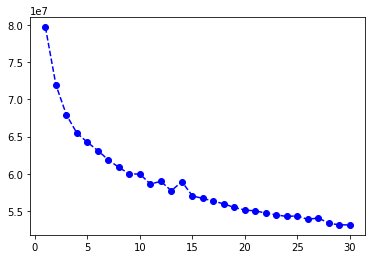

In [68]:
# Over a number of different cluster counts...
from sklearn.cluster import MiniBatchKMeans

def kmeans_scores(data, n):
    k_means = MiniBatchKMeans(n_clusters=n)
    model = k_means.fit(data)
    score = np.abs(model.score(data))
    
    return score

scores = []
centers = list(range(1,31))

for center in centers:
    scores.append(kmeans_scores(pca_scores, center))
    
plt.plot(centers, scores, linestyle='--', marker='o', color='b')

In [69]:
# Investigate the change in within-cluster distance across number of clusters.
# HINT: Use matplotlib's plot function to visualize this relationship.


In [70]:
# Re-fit the k-means model with the selected number of clusters and obtain
# cluster predictions for the general population demographics data.
from sklearn.cluster import KMeans
k_means = KMeans(8)
model = k_means.fit(pca_scores)
labels = model.predict(pca_scores)

### Discussion 3.1: Apply Clustering to General Population
After plotting the elbow method for 30 different clusters, I chose to move forward with 8 clusters since it seemed there was an inflection point in the score/error vs. cluster graph around that value.

### Step 3.2: Apply All Steps to the Customer Data

Now that you have clusters and cluster centers for the general population, it's time to see how the customer data maps on to those clusters. Take care to not confuse this for re-fitting all of the models to the customer data. Instead, you're going to use the fits from the general population to clean, transform, and cluster the customer data. In the last step of the project, you will interpret how the general population fits apply to the customer data.

- Don't forget when loading in the customers data, that it is semicolon (`;`) delimited.
- Apply the same feature wrangling, selection, and engineering steps to the customer demographics using the `clean_data()` function you created earlier. (You can assume that the customer demographics data has similar meaning behind missing data patterns as the general demographics data.)
- Use the sklearn objects from the general demographics data, and apply their transformations to the customers data. That is, you should not be using a `.fit()` or `.fit_transform()` method to re-fit the old objects, nor should you be creating new sklearn objects! Carry the data through the feature scaling, PCA, and clustering steps, obtaining cluster assignments for all of the data in the customer demographics data.

In [71]:
# Load in the customer demographics data.
customers = pd.read_csv('Udacity_CUSTOMERS_Subset.csv', delimiter=';')

In [72]:
# Apply preprocessing, feature transformation, and clustering from the general
# demographics onto the customer data, obtaining cluster predictions for the
# customer demographics data.
customers_cleaned = clean_data(customers)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [73]:
customers_cleaned.shape

(136159, 126)

In [74]:
scaled_df.shape

(750418, 126)

In [75]:
# confirm columns are the same
for i in range(len(scaled_df.columns)):
    if scaled_df.columns[i] != customers_cleaned.columns[i]:
        print(scaled_df.columns[i])

In [76]:
customers_cleaned.isnull().sum().sort_values()

CJT_GESAMTTYP_3.0          0
FINANZTYP_5                0
FINANZTYP_4                0
FINANZTYP_3                0
FINANZTYP_2                0
FINANZTYP_1                0
CJT_GESAMTTYP_6.0          0
CJT_GESAMTTYP_5.0          0
CJT_GESAMTTYP_4.0          0
SHOPPER_TYP_1.0            0
FINANZTYP_6                0
CJT_GESAMTTYP_2.0          0
SHOPPER_TYP_2.0            0
SHOPPER_TYP_3.0            0
ZABEOTYP_1                 0
ZABEOTYP_2                 0
ZABEOTYP_3                 0
ZABEOTYP_4                 0
ZABEOTYP_5                 0
ZABEOTYP_6                 0
GEBAEUDETYP_1.0            0
CJT_GESAMTTYP_1.0          0
GFK_URLAUBERTYP_1.0        0
GFK_URLAUBERTYP_2.0        0
GFK_URLAUBERTYP_3.0        0
NATIONALITAET_KZ_2.0       0
NATIONALITAET_KZ_1.0       0
LP_STATUS_GROB_5.0         0
LP_STATUS_GROB_4.0         0
LP_STATUS_GROB_3.0         0
                        ... 
EWDICHTE                  30
INNENSTADT                30
ALTERSKATEGORIE_GROB     212
CAMEO_LIFE_STA

In [77]:
customers_cleaned.dropna(inplace=True)

In [78]:
customers_cleaned.shape

(115643, 126)

In [79]:
# kept 85% of data by dropping NaN-containing rows. That's fine.
115643/136519

0.8470835561350435

In [80]:
# Apply feature scaling to the customers demographics data.
cust_scaled_arr = scaler.transform(customers_cleaned)
scaled_cust_df = pd.DataFrame(cust_scaled_arr, columns=customers_cleaned.columns, index=customers_cleaned.index)
scaled_cust_df

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,...,CAMEO_DEUG_2015_4,CAMEO_DEUG_2015_5,CAMEO_DEUG_2015_6,CAMEO_DEUG_2015_7,CAMEO_DEUG_2015_8,CAMEO_DEUG_2015_9,PRAEG_DECADE,PRAEG_MOVEMENT,CAMEO_WEALTH,CAMEO_LIFE_STAGE
0,1.183922,-1.043960,1.425146,-1.154294,1.134851,-1.247798,-0.454592,-0.820776,1.881476,-1.637143,...,-0.386662,-0.271326,-0.393616,-0.331084,-0.456833,-0.400285,-1.631771,1.881476,-1.552118,0.087178
2,1.183922,0.957891,1.425146,-1.154294,1.134851,-1.247798,0.981368,0.608034,1.881476,-0.314313,...,-0.386662,3.685605,-0.393616,-0.331084,-0.456833,-0.400285,-1.631771,1.881476,-0.188085,0.759084
4,0.202358,-1.043960,-0.030038,-1.154294,0.408554,0.791858,1.699349,-0.820776,-0.531497,1.008517,...,-0.386662,-0.271326,-0.393616,3.020385,-0.456833,-0.400285,-0.264303,-0.531497,0.493932,-1.256634
5,0.202358,-1.043960,1.425146,-1.154294,1.134851,-1.247798,-0.454592,-0.106371,1.881476,1.008517,...,-0.386662,3.685605,-0.393616,-0.331084,-0.456833,-0.400285,-1.631771,1.881476,-0.188085,0.759084
6,1.183922,-1.043960,1.425146,-1.154294,1.134851,-1.247798,-1.172572,-0.820776,1.881476,-0.314313,...,-0.386662,-0.271326,-0.393616,-0.331084,-0.456833,-0.400285,-1.631771,1.881476,-0.870101,0.087178
7,1.183922,-1.043960,1.425146,-1.154294,1.134851,-1.247798,-0.454592,-0.820776,1.881476,-1.637143,...,-0.386662,-0.271326,-0.393616,-0.331084,-0.456833,-0.400285,-1.631771,1.881476,-1.552118,1.430991
9,0.202358,-1.043960,1.425146,-0.481156,0.408554,-1.247798,0.263388,-1.535182,1.881476,1.008517,...,-0.386662,-0.271326,-0.393616,-0.331084,-0.456833,-0.400285,-0.264303,1.881476,-1.552118,1.430991
11,1.183922,-1.043960,1.425146,-1.154294,1.134851,-1.247798,0.263388,-0.820776,1.881476,-1.637143,...,-0.386662,-0.271326,-0.393616,-0.331084,-0.456833,-0.400285,-1.631771,1.881476,-1.552118,0.759084
12,1.183922,-1.043960,1.425146,-0.481156,0.408554,0.111973,-0.454592,-1.535182,-0.531497,-0.314313,...,2.586239,-0.271326,-0.393616,-0.331084,-0.456833,-0.400285,-0.264303,-0.531497,-0.870101,-0.584728
14,1.183922,0.957891,-0.030038,-1.154294,1.134851,-1.247798,-0.454592,1.322440,-0.531497,-0.314313,...,-0.386662,-0.271326,-0.393616,-0.331084,-0.456833,2.498221,-2.315505,-0.531497,1.175949,-1.256634


In [81]:
cust_pca_scores = pca.transform(scaled_cust_df)

In [82]:
cust_labels = model.predict(cust_pca_scores)

In [83]:
cust_labels.shape

(115643,)

In [84]:
labels.shape

(750418,)

### Step 3.3: Compare Customer Data to Demographics Data

At this point, you have clustered data based on demographics of the general population of Germany, and seen how the customer data for a mail-order sales company maps onto those demographic clusters. In this final substep, you will compare the two cluster distributions to see where the strongest customer base for the company is.

Consider the proportion of persons in each cluster for the general population, and the proportions for the customers. If we think the company's customer base to be universal, then the cluster assignment proportions should be fairly similar between the two. If there are only particular segments of the population that are interested in the company's products, then we should see a mismatch from one to the other. If there is a higher proportion of persons in a cluster for the customer data compared to the general population (e.g. 5% of persons are assigned to a cluster for the general population, but 15% of the customer data is closest to that cluster's centroid) then that suggests the people in that cluster to be a target audience for the company. On the other hand, the proportion of the data in a cluster being larger in the general population than the customer data (e.g. only 2% of customers closest to a population centroid that captures 6% of the data) suggests that group of persons to be outside of the target demographics.

Take a look at the following points in this step:

- Compute the proportion of data points in each cluster for the general population and the customer data. Visualizations will be useful here: both for the individual dataset proportions, but also to visualize the ratios in cluster representation between groups. Seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) or [`barplot()`](https://seaborn.pydata.org/generated/seaborn.barplot.html) function could be handy.
  - Recall the analysis you performed in step 1.1.3 of the project, where you separated out certain data points from the dataset if they had more than a specified threshold of missing values. If you found that this group was qualitatively different from the main bulk of the data, you should treat this as an additional data cluster in this analysis. Make sure that you account for the number of data points in this subset, for both the general population and customer datasets, when making your computations!
- Which cluster or clusters are overrepresented in the customer dataset compared to the general population? Select at least one such cluster and infer what kind of people might be represented by that cluster. Use the principal component interpretations from step 2.3 or look at additional components to help you make this inference. Alternatively, you can use the `.inverse_transform()` method of the PCA and StandardScaler objects to transform centroids back to the original data space and interpret the retrieved values directly.
- Perform a similar investigation for the underrepresented clusters. Which cluster or clusters are underrepresented in the customer dataset compared to the general population, and what kinds of people are typified by these clusters?

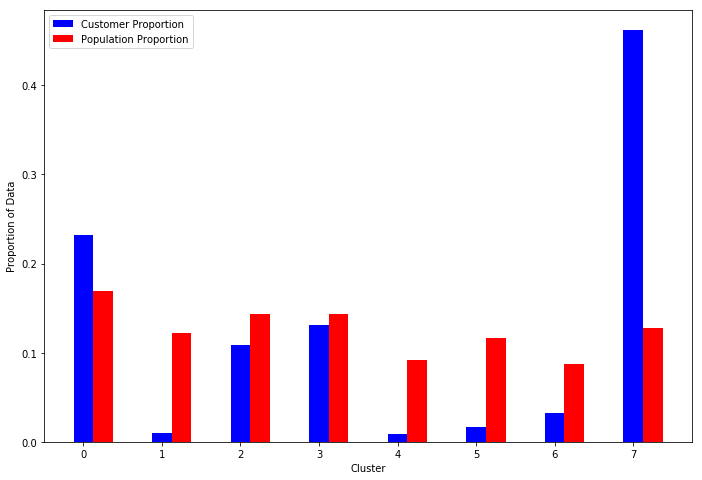

In [85]:
# Compare the proportion of data in each cluster for the customer data to the
# proportion of data in each cluster for the general population.
cust_cluster_freq = np.unique(cust_labels, return_counts=True)
pop_cluster_freq = np.unique(labels, return_counts=True)

cust_proportion = []
pop_proportion = []
for i in range(len(cust_cluster_freq[0])):
    cust_proportion.append(cust_cluster_freq[1][i]/np.sum(cust_cluster_freq[1]))
    pop_proportion.append(pop_cluster_freq[1][i]/np.sum(pop_cluster_freq[1]))

proportion_list = [cust_proportion, pop_proportion]
cluster_range = np.arange(8)

fig = plt.figure()
ax = fig.add_axes([0,0,1.5,1.5])
ax.set_xlabel('Cluster')
ax.set_ylabel('Proportion of Data')
ax.bar(cluster_range + 0.00, proportion_list[0], color = 'b', width = 0.25)
ax.bar(cluster_range + 0.25, proportion_list[1], color = 'r', width = 0.25)
ax.legend(labels=['Customer Proportion', 'Population Proportion'])


In [86]:
# What kinds of people are part of a cluster that is overrepresented in the
# customer data compared to the general population?

# Those in cluster 7 are significantly overrepresented in the customer data, 
# and those in cluster 0 are as well, but to a lesser degree.

centroid7 = scaler.inverse_transform(pca.inverse_transform(model.cluster_centers_[7]))
centroid7 = [round(x) for x in centroid7]

In [87]:
df = pd.DataFrame([centroid7], columns=scaled_df.columns)
df = pd.melt(df)
pd.set_option("display.max_rows", None)
df

,variable,value
0,ALTERSKATEGORIE_GROB,3.0
1,ANREDE_KZ,2.0
2,FINANZ_MINIMALIST,5.0
3,FINANZ_SPARER,2.0
4,FINANZ_VORSORGER,4.0
5,FINANZ_ANLEGER,2.0
6,FINANZ_UNAUFFAELLIGER,2.0
7,FINANZ_HAUSBAUER,2.0
8,GREEN_AVANTGARDE,1.0
9,HEALTH_TYP,2.0


In [88]:
# What kinds of people are part of a cluster that is underrepresented in the
# customer data compared to the general population?
centroid3 = scaler.inverse_transform(pca.inverse_transform(model.cluster_centers_[3]))
centroid3 = [round(x) for x in centroid3]
df = pd.DataFrame([centroid3], columns=scaled_df.columns)
df = pd.melt(df)
pd.set_option("display.max_rows", None)
df

,variable,value
0,ALTERSKATEGORIE_GROB,3.0
1,ANREDE_KZ,1.0
2,FINANZ_MINIMALIST,3.0
3,FINANZ_SPARER,2.0
4,FINANZ_VORSORGER,4.0
5,FINANZ_ANLEGER,2.0
6,FINANZ_UNAUFFAELLIGER,2.0
7,FINANZ_HAUSBAUER,4.0
8,GREEN_AVANTGARDE,0.0
9,HEALTH_TYP,2.0


### Discussion 3.3: Compare Customer Data to Demographics Data

The 7th cluster is overrepresented in the customer data as compared to the general population. Therefore, the customer demographics here are of interest for this company. After transforming the data back into original values within this cluster, I have come to the following general conclusions about this target customer:

Later stage females (46 to 60 years of age) that are very high income families/prosperous households. As they are later stage in life, they don't tend to have any dependents/children. They are typically conservative purchasers and environmentally concious. More liberal in principles.

There are a number of underrepresented cluster for the customer data compared to the general population. I chose to look at the largest discrepancy, cluster 3. These people can be characterized as:

Females in their 30s to early 40s. The 90s were the dominant era of their youth. Typically, they are less well-off and part of a young couple. They tend to be more conservative in values and can be spenders/not great at financial planning. They might be single parents, or single with no kids.

> Congratulations on making it this far in the project! Before you finish, make sure to check through the entire notebook from top to bottom to make sure that your analysis follows a logical flow and all of your findings are documented in **Discussion** cells. Once you've checked over all of your work, you should export the notebook as an HTML document to submit for evaluation. You can do this from the menu, navigating to **File -> Download as -> HTML (.html)**. You will submit both that document and this notebook for your project submission.